# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least two datasets** on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * You must state a question you are seeking to answer with your visualizations.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together as an example! [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
# Region and Domain
# California, United States
# Sports and Athletics

In [ ]:
# Research question
# How have the win_loss ratio for the California baseball teams change over the last ten years? Is there any team that performed better than the others?
# The data covers five teams: The Los Angeles Angels of Anaheim, The Los Angeles Dodgers, The San Francisco Giants, The Oakland Athletics and The San Diego Padres) 

In [ ]:
# Links
# Lahman’s Baseball Database: https://www.seanlahman.com/baseball-archive/statistics/
# file location: https://github.com/chadwickbureau/baseballdatabank/archive/refs/tags/v2022.2.zip

In [2]:
import numpy as np
import pandas as pd
teams=pd.read_csv('Teams.csv')
teams_2012=teams.loc[(teams.yearID>=2012) & (teams.yearID<=2021),]
teams_2012=teams_2012[['yearID','teamID','name','W','L']]
teams_2012['WL']=teams_2012['W']/(teams_2012['W']+teams_2012['L'])
name_cal=['San Francisco Giants','Los Angeles Angels of Anaheim','Los Angeles Dodgers','Oakland Athletics','San Diego Padres']
teams_2012_cal=teams_2012.loc[teams_2012.name.isin(name_cal),]
teams_2012_cal=teams_2012_cal.set_index('yearID')

In [3]:
    s={'LAA':teams_2012_cal.loc[teams_2012_cal.name=='Los Angeles Angels of Anaheim','WL'],
   'LAN':teams_2012_cal.loc[teams_2012_cal.name=='Los Angeles Dodgers','WL'],
   'SFN':teams_2012_cal.loc[teams_2012_cal.name=='San Francisco Giants','WL'],
   'OAK':teams_2012_cal.loc[teams_2012_cal.name=='Oakland Athletics','WL'],
   'SDN':teams_2012_cal.loc[teams_2012_cal.name=='San Diego Padres','WL'],}
df=pd.DataFrame(data=s)

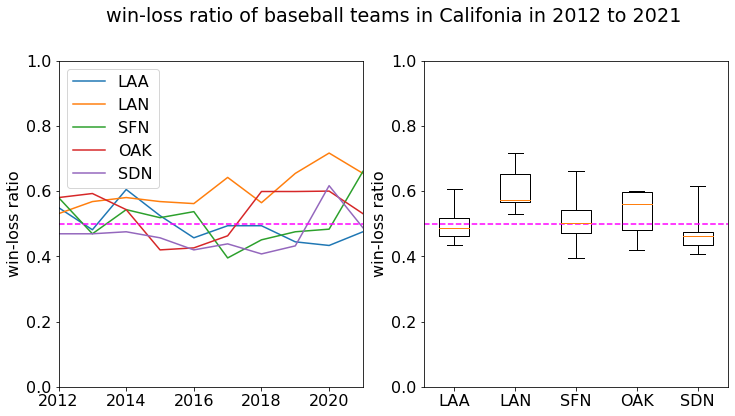

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(12, 6))
plt.rc('font', size=16)

plt.subplot(1,2,1)
plt.plot(df.index, df)
plt.xlim(2012,2021)
plt.ylim([0,1])
plt.axhline(0.5,color='fuchsia',linestyle='dashed')
plt.legend(['LAA','LAN','SFN','OAK','SDN'])
plt.ylabel('win-loss ratio')
plt.title('win-loss ratio of baseball teams in Califonia in 2012 to 2021',x=1.1, y=1.1)

plt.subplot(1,2,2)
plt.boxplot(df,whis=[0,100],labels=['LAA','LAN','SFN','OAK','SDN'])
plt.ylim([0,1])
plt.axhline(0.5,color='fuchsia',linestyle='dashed')

plt.ylabel('win-loss ratio')

plt.savefig('baseball_Cal.jpg')

In [ ]:
"""
Abbreviations of teams
LAA: The Los Angeles Angels of Anaheim 
LAN: The Los Angeles Dodgers
SFN: The San Francisco Giants 
OAK: The Oakland Athletics 
SDN: The San Diego Padres
"""

In [6]:
"""
Discussion
These figures show the win-loss ratio for the five baseball teams in California from 2012 to 2021. 
The original data from Lahman’s Baseball Database covers statistics of all teams in the US from 1871 to 2021.
The 'yearID','name','W' and 'L' data of the five California teams in the past ten years were analyzed.
The win-loss ratio was calculated by deviding the number of wins by the sum of win and loss numbers. 

The pink dash lines in both figures indicate the win-loss ratio = 0.5. For the first figure, LAN shows a win-loss record above 0.5, 
while the rests fluctuate around 0.5. Also, the trend of LAN is upward, suggesting an increase in its performance in the past ten years.
It seems that LAA shows a downward trend in recent years. For the rests, the trend is not obvious and needs further investigations.
A boxplot compares the mean of win-loss ratio for the five teams. The whiskers cover all the data points. LAN and OAK has a mean above 0.5.
For LAN, it is clear that all of its records are above 0.5, indicating a better performance than the other teams.
"""

"\nDiscussion\nThese figures show the win-loss ratio for the five baseball teams in California from 2012 to 2021. \nThe original data from Lahman’s Baseball Database covers statistics of all teams in the US from 1871 to 2021.\nThe 'yearID','name','W' and 'L' data of the five California teams in the past ten years were analyzed.\nThe win-loss ratio was calculated by deviding the number of wins by the sum of win and loss numbers. \n\nThe pink dash lines in both figures indicate the win-loss ratio = 0.5. For the first figure, LAN shows a win-loss record above 0.5, \nwhile the rests fluctuate around 0.5. Also, the trend of LAN is upward, suggesting an increase in its performance in the past ten years.\nIt seems that LAA shows a downward trend in recent years. For the rests, the trend is not obvious and needs further investigations.\nA boxplot compares the mean of win-loss ratio for the five teams. The whiskers cover all the data points. LAN and OAK has a mean above 0.5.\nFor LAN, it is cle